In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Load the dataset
df = pd.read_csv('Data_Cortex_Nuclear.csv')

First 5 protein distrbution across 1080 mice

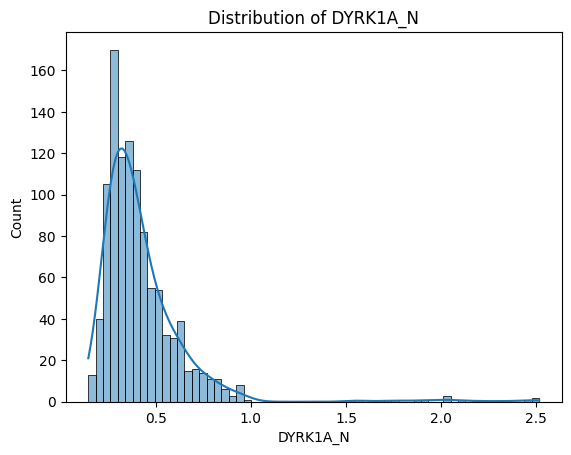

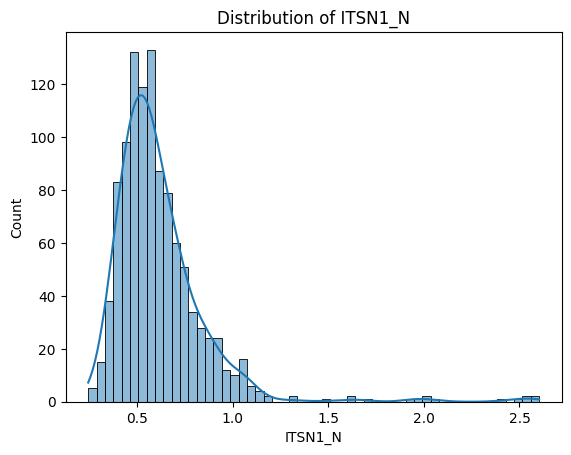

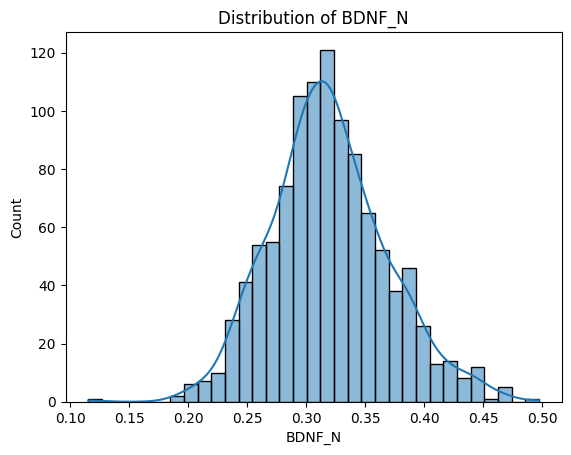

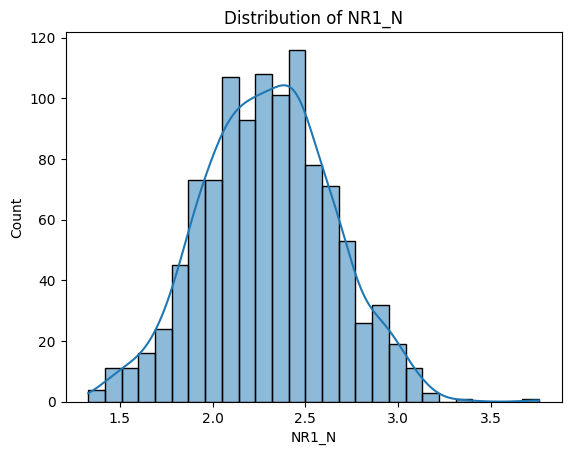

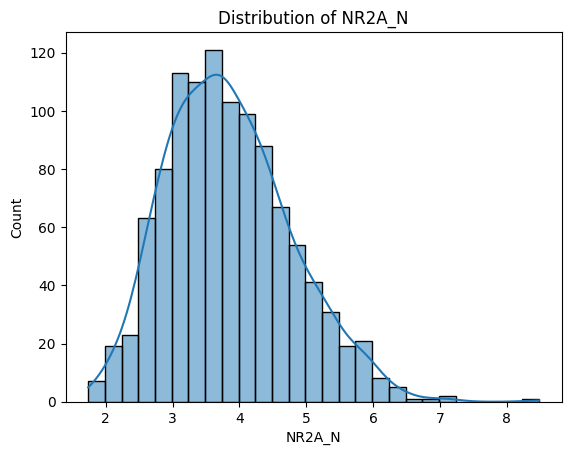

In [3]:
# Distribution Analysis for first 5 proteins
for col in df.columns[1:-76]:
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


In [4]:
pd.set_option('display.max_rows', None)


In [5]:
meanforDYRK1A_N =  df['DYRK1A_N'].mean()
meanforDYRK1A_N

0.42581016290993495

In [6]:
df['DYRK1A_N'].fillna(meanforDYRK1A_N,inplace= True)

In [7]:
df['DYRK1A_N'].isna().sum()

0

In [8]:
meanforITSN1_N = df['ITSN1_N'].mean()
meanforITSN1_N

0.6171019784493964

In [9]:
df['ITSN1_N'].fillna(meanforITSN1_N , inplace = True)

In [10]:
df['ITSN1_N'].isna().sum()

0

In [11]:
null_columns = df.columns[df.isnull().any()]

In [12]:
null_columns

Index(['BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N', 'pBRAF_N', 'pCAMKII_N',
       'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N', 'PKCA_N', 'pMEK_N', 'pNR1_N',
       'pNR2A_N', 'pNR2B_N', 'pPKCAB_N', 'pRSK_N', 'AKT_N', 'BRAF_N',
       'CAMKII_N', 'CREB_N', 'ELK_N', 'ERK_N', 'GSK3B_N', 'JNK_N', 'MEK_N',
       'TRKA_N', 'RSK_N', 'APP_N', 'Bcatenin_N', 'SOD1_N', 'MTOR_N', 'P38_N',
       'pMTOR_N', 'DSCR1_N', 'AMPKA_N', 'NR2B_N', 'pNUMB_N', 'RAPTOR_N',
       'TIAM1_N', 'pP70S6_N', 'BAD_N', 'BCL2_N', 'pCFOS_N', 'H3AcK18_N',
       'EGR1_N', 'H3MeK4_N'],
      dtype='object')

In [13]:
columns_with_nulls = ['BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N', 'pBRAF_N', 'pCAMKII_N',
                      'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N', 'PKCA_N', 'pMEK_N', 
                      'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'pPKCAB_N', 'pRSK_N', 'AKT_N', 
                      'BRAF_N', 'CAMKII_N', 'CREB_N', 'ELK_N', 'ERK_N', 'GSK3B_N', 
                      'JNK_N', 'MEK_N', 'TRKA_N', 'RSK_N', 'APP_N', 'Bcatenin_N', 
                      'SOD1_N', 'MTOR_N', 'P38_N', 'pMTOR_N', 'DSCR1_N', 'AMPKA_N', 
                      'NR2B_N', 'pNUMB_N', 'RAPTOR_N', 'TIAM1_N', 'pP70S6_N', 'BAD_N', 
                      'BCL2_N', 'pCFOS_N', 'H3AcK18_N', 'EGR1_N', 'H3MeK4_N']

In [14]:
for column in columns_with_nulls:
    if column in df.columns:
        df[column].fillna(df[column].mean(), inplace=True)

In [15]:
nullColumns = df.columns[df.isnull().any()]

In [16]:
nullColumns

Index([], dtype='object')

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
sc = MinMaxScaler()

In [19]:
columns = ['DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N',
       'pBRAF_N', 'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N',
       'PKCA_N', 'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'pPKCAB_N',
       'pRSK_N', 'AKT_N', 'BRAF_N', 'CAMKII_N', 'CREB_N', 'ELK_N', 'ERK_N',
       'GSK3B_N', 'JNK_N', 'MEK_N', 'TRKA_N', 'RSK_N', 'APP_N', 'Bcatenin_N',
       'SOD1_N', 'MTOR_N', 'P38_N', 'pMTOR_N', 'DSCR1_N', 'AMPKA_N', 'NR2B_N',
       'pNUMB_N', 'RAPTOR_N', 'TIAM1_N', 'pP70S6_N', 'NUMB_N', 'P70S6_N',
       'pGSK3B_N', 'pPKCG_N', 'CDK5_N', 'S6_N', 'ADARB1_N', 'AcetylH3K9_N',
       'RRP1_N', 'BAX_N', 'ARC_N', 'ERBB4_N', 'nNOS_N', 'Tau_N', 'GFAP_N',
       'GluR3_N', 'GluR4_N', 'IL1B_N', 'P3525_N', 'pCASP9_N', 'PSD95_N',
       'SNCA_N', 'Ubiquitin_N', 'pGSK3B_Tyr216_N', 'SHH_N', 'BAD_N', 'BCL2_N',
       'pS6_N', 'pCFOS_N', 'SYP_N', 'H3AcK18_N', 'EGR1_N', 'H3MeK4_N',
       'CaNA_N']

In [20]:
df[columns] = sc.fit_transform(df[columns])

In [21]:
df['Genotype'].value_counts()

Genotype
Control    570
Ts65Dn     510
Name: count, dtype: int64

In [22]:
df['Genotype'] = df['Genotype'].apply(lambda x: 0 if x == 'Control' else 1 if x == 'Ts65Dn' else x)

In [23]:
df['Genotype'].value_counts()

Genotype
0    570
1    510
Name: count, dtype: int64

In [24]:
df['Treatment'].value_counts()

Treatment
Memantine    570
Saline       510
Name: count, dtype: int64

In [25]:
df['Treatment'] = df['Treatment'].apply(lambda x: 0 if x == 'Memantine' else 1 if x=='Saline' else x)

In [26]:
df['Treatment'].value_counts()

Treatment
0    570
1    510
Name: count, dtype: int64

In [27]:
df['Behavior'].value_counts()

Behavior
S/C    555
C/S    525
Name: count, dtype: int64

In [28]:
df['Behavior'] = df['Behavior'].apply(lambda x: 0 if x=='S/C' else 1 if x=='C/S' else x)

In [29]:
df['Behavior'].value_counts()

Behavior
0    555
1    525
Name: count, dtype: int64

In [30]:
df['class'].value_counts()

class
c-CS-m    150
c-SC-m    150
c-CS-s    135
c-SC-s    135
t-CS-m    135
t-SC-m    135
t-SC-s    135
t-CS-s    105
Name: count, dtype: int64

In [31]:
one_hot = pd.get_dummies(df['class'], prefix='class').astype(int)

In [32]:
df['class'].value_counts()

class
c-CS-m    150
c-SC-m    150
c-CS-s    135
c-SC-s    135
t-CS-m    135
t-SC-m    135
t-SC-s    135
t-CS-s    105
Name: count, dtype: int64

In [33]:
# create a dictionary that maps class names to integer values
class_mapping = {
    'c-CS-m': 0,
    'c-SC-m': 1,
    'c-CS-s': 2,
    'c-SC-s': 3,
    't-CS-m': 4,
    't-SC-m': 5,
    't-CS-s': 6,
    't-SC-s': 7
}

# apply the mapping to the 'class' column in the dataframe
df['class'] = df['class'].map(class_mapping)

In [34]:
df['class'].value_counts()

class
0    150
1    150
2    135
3    135
4    135
5    135
7    135
6    105
Name: count, dtype: int64

In [35]:
c_CS_m = df[df["class"] == 0]
c_SC_m = df[df["class"] == 1]
c_CS_s = df[df["class"] == 2]
c_SC_s = df[df["class"] == 3]
t_CS_m = df[df["class"] == 4]
t_SC_m = df[df["class"] == 5]
t_CS_s = df[df["class"] == 6]
t_SC_s = df[df["class"] == 7]

Class distribution across first five proteins

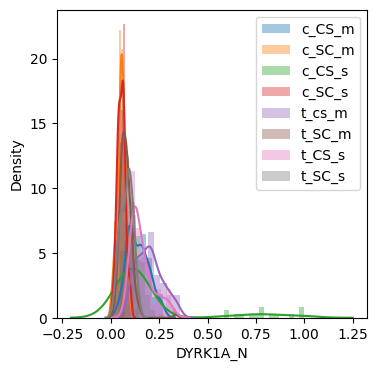

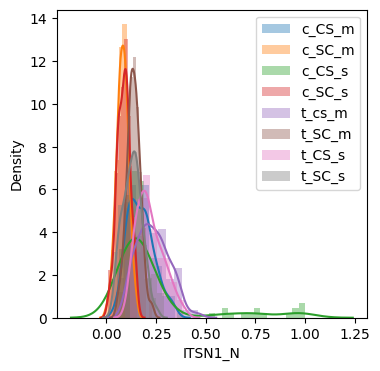

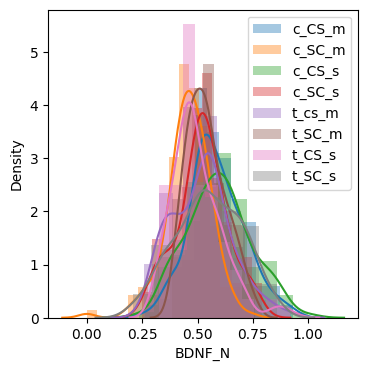

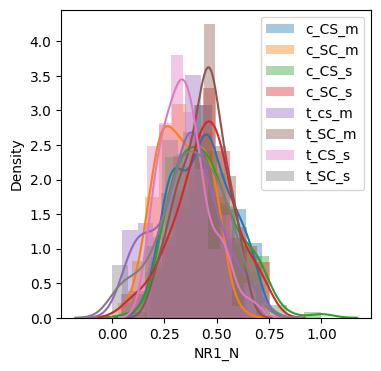

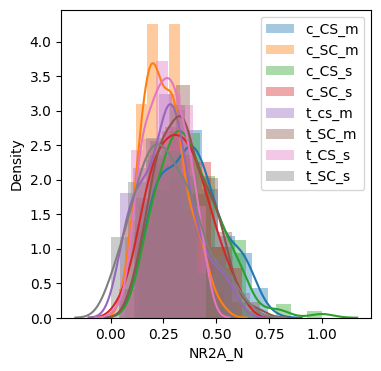

In [37]:
for col in df.columns[1:-76]:
    plt.figure(figsize=(4,4))
    sns.distplot(c_CS_m[col],label='c_CS_m')
    sns.distplot(c_SC_m[col],label='c_SC_m')
    sns.distplot(c_CS_s[col],label='c_CS_s')
    sns.distplot(c_SC_s[col],label='c_SC_s')
    sns.distplot(t_CS_m[col],label='t_cs_m')
    sns.distplot(t_SC_m[col],label='t_SC_m')
    sns.distplot(t_CS_s[col],label='t_CS_s')
    sns.distplot(t_SC_s[col],label='t_SC_s')
    plt.legend()
    plt.show()

In [38]:
df.head(10)

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,pNUMB_N,RAPTOR_N,TIAM1_N,pP70S6_N,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.151122,0.212885,0.824638,0.612119,0.630482,0.327006,0.448666,0.168257,0.617322,0.232553,0.157643,0.576167,0.747688,0.598504,0.574775,0.286697,0.650637,0.698164,0.622784,0.711198,0.136915,0.419649,0.317149,0.593715,0.627907,0.596269,0.640167,0.643070,0.766146,0.295596,0.549817,0.747441,0.092035,0.541196,0.152338,0.687269,0.553922,0.467278,0.509996,0.469461,0.436170,0.506018,0.163368,0.323059,0.373254,0.604516,0.303363,0.178458,0.324085,0.402810,0.083584,0.327870,0.690257,0.426816,0.412721,0.477834,0.057168,0.228825,0.531163,0.151103,0.242608,0.169702,0.432843,0.483783,0.044770,0.256699,0.405228,0.162941,0.177312,0.299172,0.426816,0.133930,0.336299,0.087715,0.102890,0.084580,0.705738,0,0,1,0
1,309_2,0.155750,0.188226,0.776455,0.601070,0.585247,0.311887,0.429899,0.154925,0.590173,0.205362,0.159721,0.559556,0.688545,0.559598,0.502766,0.270688,0.587926,0.591606,0.629311,0.689095,0.128911,0.383669,0.291583,0.548032,0.578736,0.584234,0.614355,0.586180,0.724593,0.251840,0.491969,0.701976,0.075589,0.467650,0.137451,0.621033,0.512117,0.409897,0.457694,0.410046,0.383101,0.447496,0.145594,0.322736,0.376914,0.618918,0.302059,0.177452,0.324004,0.386524,0.084514,0.326426,0.664894,0.429952,0.463251,0.488028,0.075103,0.251911,0.576828,0.149555,0.285860,0.212421,0.472327,0.477640,0.054452,0.226088,0.433471,0.220010,0.146494,0.299172,0.429952,0.110434,0.365208,0.080692,0.115874,0.093977,0.749771,0,0,1,0
2,309_3,0.153459,0.205696,0.793572,0.558911,0.575910,0.306369,0.441381,0.153485,0.607102,0.199194,0.154554,0.541938,0.670905,0.560573,0.554483,0.283848,0.590443,0.581558,0.669753,0.670907,0.128651,0.415579,0.292676,0.549983,0.599925,0.580790,0.625756,0.613502,0.730384,0.270560,0.472444,0.710718,0.076445,0.470688,0.137475,0.616142,0.510175,0.375653,0.467725,0.400225,0.356363,0.432379,0.125773,0.334325,0.383316,0.657565,0.332565,0.189744,0.369553,0.373234,0.094486,0.312439,0.700212,0.448652,0.415863,0.475009,0.071718,0.248192,0.607535,0.150434,0.373879,0.202733,0.467603,0.484953,0.044526,0.214719,0.429387,0.186816,0.155920,0.299172,0.448652,0.121560,0.353621,0.080465,0.109050,0.082162,0.868229,0,0,1,0
3,309_4,0.125169,0.157688,0.637326,0.468152,0.480646,0.335530,0.444307,0.132074,0.486945,0.205135,0.127028,0.554293,0.657048,0.640641,0.413245,0.211238,0.522319,0.627585,0.687775,0.593408,0.121509,0.401866,0.319599,0.342080,0.452058,0.545716,0.625528,0.492220,0.667283,0.277208,0.440780,0.536330,0.076936,0.479533,0.144945,0.605654,0.514305,0.338199,0.461189,0.406715,0.402786,0.422989,0.267936,0.220414,0.311501,0.549444,0.364189,0.181101,0.231762,0.333033,0.076248,0.338264,0.669358,0.392700,0.372772,0.397939,0.053257,0.245676,0.562594,0.156083,0.242672,0.184790,0.364359,0.449304,0.119259,0.208943,0.407971,0.179047,0.229602,0.299172,0.392700,0.151031,0.265619,0.126763,0.164241,0.144543,0.721879,0,0,1,0
4,309_5,0.122146,0.157838,0.637787,0.426467,0.441977,0.314976,0.433100,0.129086,0.410194,0.189152,0.117572,0.532161,0.608970,0.551236,0.401706,0.200364,0.486489,0.579839,0.698127,0.557701,0.112407,0.381348,0.297196,0.358746,0.433909,0.519977,0.599623,0.471524,0.627685,0.239874,0.410395,0.519186,0.067645,0.436522,0.121261,0.548237,0.501294,0.283304,0.416698,0.372548,0.353712,0.374357,0.262839,0.212521,0.317400,0.559551,0.376199,0.181805,0.258720,0.337126,0.079697,0.330219,0.686524,0.410187,0.385008,0.422195,0.080162,0.234762,0.6

# Dimensionality Reduction

* Dimensionality reduction, or dimension reduction, is the transformation of data from a high-dimensional space into a low-dimensional space.
* So that the low-dimensional representation retains some meaningful properties of the original data, ideally close to its intrinsic dimension.

## Using PCA

* Principal Component Analysis (PCA) is used for dimensionality reduction for several reasons:
    * 1. Reducing Computational Complexity:
    * 2. Mitigating the Curse of Dimensionality:
    * 3. Noise Reduction:
    * 4. Improving Model Performance:


In [43]:
X_scaled = df[columns] 

In [44]:
X_scaled = pd.DataFrame(X_scaled)

X_scaled.shape

(1080, 77)

[Encoding] Encoded using Label Encoding --> Genotype, Treatment, Behavior, Class


* OneHot encoding is simple but it can lead to high-dimensional feature spaces and introduce multicollinearity among the features which is not good for the datasets which already has over 80 cols, so I decided to use Label Enoding.

In [47]:
from sklearn import preprocessing 

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz 


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import plot_tree

from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras import layers

In [48]:
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'Genotype'.
df['Genotype']= label_encoder.fit_transform(df['Genotype'])
df['Genotype'].unique()

print('Control = 0 , Ts65Dn = 1')

Control = 0 , Ts65Dn = 1


In [49]:
df['Treatment']= label_encoder.fit_transform(df['Treatment'])
df['Treatment'].unique()

print('Memantine = 0 , Saline = 1')

Memantine = 0 , Saline = 1


In [50]:
df['Behavior']= label_encoder.fit_transform(df['Behavior'])
df['Behavior'].unique()

print("C/S = 0, S/C = 1")

C/S = 0, S/C = 1


In [51]:
df['class'].unique()


array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int64)

In [52]:
df['class'].unique()


array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int64)

In [53]:
pca = PCA().fit(X_scaled)

X_pca = pca.transform(X_scaled)

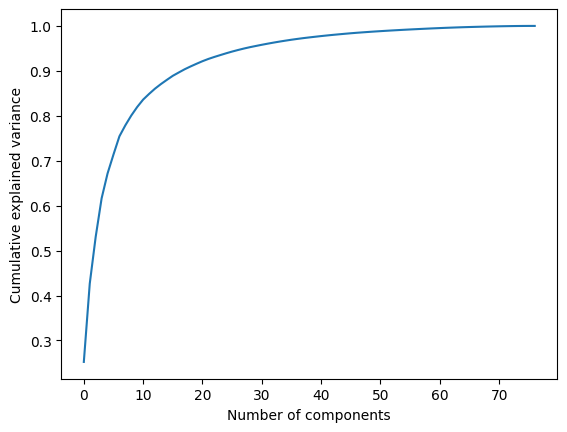

In [54]:
# Calculate the cumulative explained variance ratio for each component
cumulative_var_ratio = np.cumsum(pca.explained_variance_ratio_)

# Plot the cumulative explained variance ratio as a function of the number of components
plt.plot(cumulative_var_ratio)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [55]:
## Reduce it to 3 dimension 
pca3 = PCA(n_components = 3)

X_pca3 = pca3.fit_transform(X_scaled)
X_principal3 = pd.DataFrame(X_pca3)


In [56]:
df['Class']= label_encoder.fit_transform(df['class'])
df['Class'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int64)

In [57]:
tsne = TSNE(n_components=3, random_state=42)
tsne_embedding = tsne.fit_transform(X_scaled)

tsne_embedding = pd.DataFrame(tsne_embedding)
tsne_embedding.shape

(1080, 3)

# Binary Classification
## Using decision tree

* Task: Build a Decision Tree model to classify mice as either control or trisomy based on their protein expression levels.


In [60]:
X_train, X_test, y_train, y_test = train_test_split(tsne_embedding, df.Genotype, test_size=0.3, random_state=1)


In [61]:
decision_tree = DecisionTreeClassifier(max_depth=3)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [62]:
y_pred = decision_tree.predict(X_test)


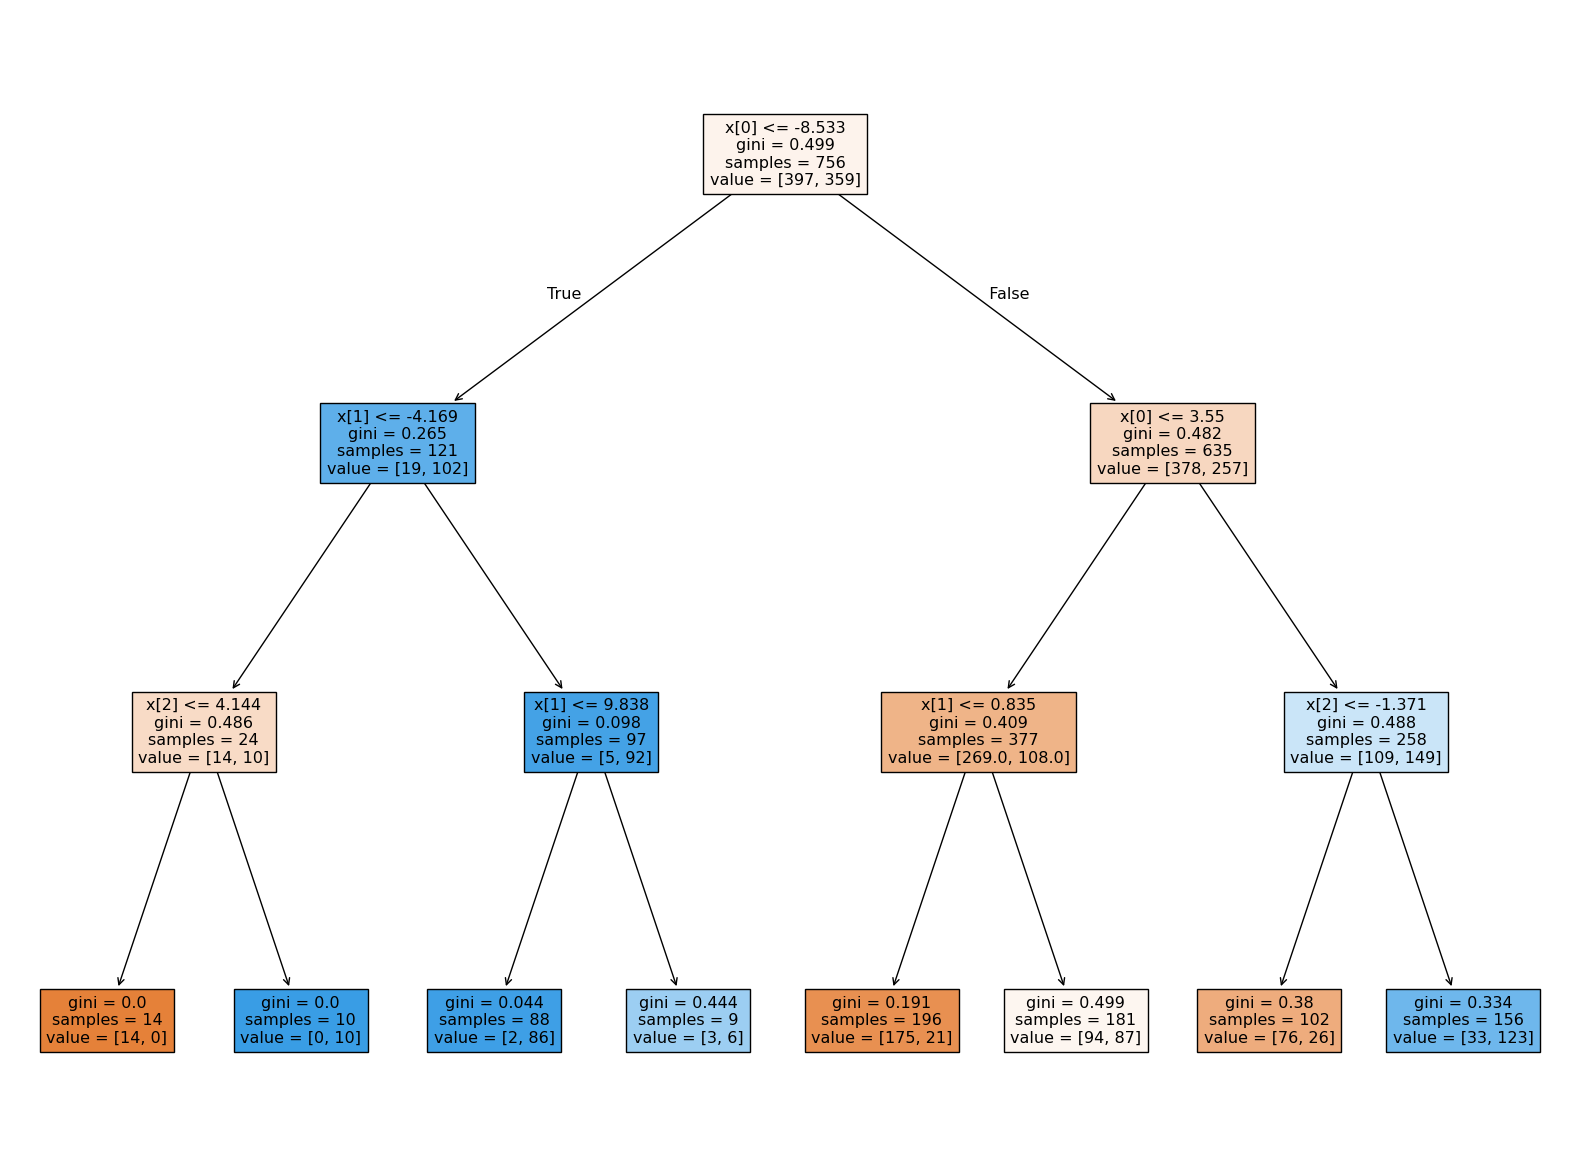

In [63]:
plt.figure(figsize=(20,15))
plot_tree(decision_tree, filled = True)
plt.show()

In [64]:
print("Accuracy of Decision Tree Model:",(accuracy_score(y_test, y_pred)))

Accuracy of Decision Tree Model: 0.7777777777777778


In [65]:
X_train, X_test, y_train, y_test = train_test_split(tsne_embedding, df.Class, test_size=0.3, random_state=1)

In [66]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print('Accuracy of Random Forest Model :', round(accuracy,3))

Accuracy of Random Forest Model : 0.991


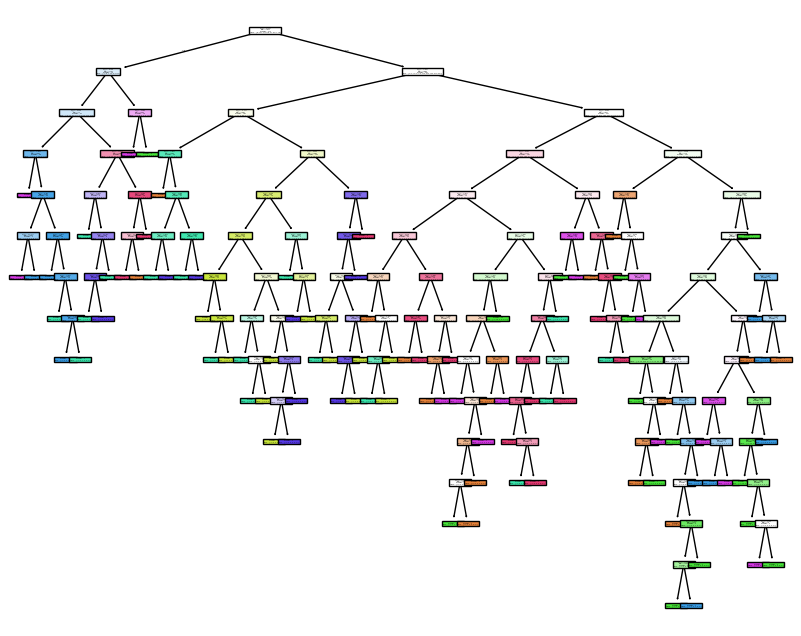

In [67]:
# visualize the random forest

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 8))
plot_tree(rf.estimators_[0], filled=True, ax=axes)

plt.show()

In [68]:
from sklearn.svm import SVC
clf = SVC(kernel='poly')

In [69]:
clf.fit(X_train, y_train)

SVC(kernel='poly')

In [70]:
from sklearn.metrics import accuracy_score
predicted = clf.predict(X_train)
print (accuracy_score(y_train, predicted))

0.6957671957671958


In [71]:
from sklearn.metrics import accuracy_score
predicted = clf.predict(X_test)
print (accuracy_score(y_test, predicted))

0.6820987654320988


In [72]:
import pandas
import matplotlib.pyplot as plt

# lbfgs adam
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', max_iter=10000,
                    learning_rate_init=0.01,alpha=1,
                     hidden_layer_sizes=(16,32, 2), random_state=42)

clf.fit(X_train, y_train)

MLPClassifier(alpha=1, hidden_layer_sizes=(16, 32, 2), learning_rate_init=0.01,
              max_iter=10000, random_state=42, solver='lbfgs')

In [73]:
import pandas
import matplotlib.pyplot as plt

# lbfgs adam
from sklearn.neural_network import MLPRegressor
clf = MLPRegressor(solver='adam', max_iter=100000,
                    learning_rate_init=0.01,alpha=1,
                     hidden_layer_sizes=(16,32, 2), random_state=None)

clf.fit(X_train, y_train)


MLPRegressor(alpha=1, hidden_layer_sizes=(16, 32, 2), learning_rate_init=0.01,
             max_iter=100000)

In [74]:
import pandas
import matplotlib.pyplot as plt

# lbfgs adam
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)

clf.fit(X_train, y_train)


MLPClassifier()

In [75]:
from sklearn.metrics import accuracy_score
predicted = clf.predict(X_train)
# prb=clf.predict_proba(X_train)
print (accuracy_score(y_train, predicted))
# print(prb)
# print(predicted)

0.8029100529100529


In [76]:
from sklearn.metrics import accuracy_score
predicted = clf.predict(X_test)
print (accuracy_score(y_test, predicted))

0.7777777777777778


In [77]:
import torch
from pytorch_tabnet.tab_model import TabNetClassifier

# Assuming tsne_embedding and df.Class are your features and target respectively
X_train, X_test, y_train, y_test = train_test_split(tsne_embedding, df['Class'], test_size=0.3, random_state=1)

# Convert to numpy arrays if they aren't already
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Define the TabNet model
clf = TabNetClassifier(
    n_d=64, 
    n_a=64, 
    n_steps=5,
    gamma=1.5,
    lambda_sparse=1e-3,
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=2e-2),
    mask_type='sparsemax',  # "sparsemax" or "entmax" or "entmax15"
    n_shared=2,
    n_independent=2,
    verbose=1
)

# Fit the model
clf.fit(
    X_train, y_train,
    max_epochs=200,
    patience=50,
    batch_size=1024,
    virtual_batch_size=128,
    num_workers=0,
    drop_last=False
)

# Evaluate the model
preds = clf.predict(X_test)
accuracy = np.mean(preds == y_test)
print(f"Test accuracy: {accuracy:.2f}")

epoch 0  | loss: 4.57796 |  0:00:00s
epoch 1  | loss: 2.65294 |  0:00:00s
epoch 2  | loss: 2.07973 |  0:00:00s
epoch 3  | loss: 1.55697 |  0:00:00s
epoch 4  | loss: 1.18834 |  0:00:00s
epoch 5  | loss: 0.9052  |  0:00:00s
epoch 6  | loss: 0.8356  |  0:00:00s
epoch 7  | loss: 0.73084 |  0:00:00s
epoch 8  | loss: 0.65872 |  0:00:00s
epoch 9  | loss: 0.61335 |  0:00:00s
epoch 10 | loss: 0.57783 |  0:00:00s
epoch 11 | loss: 0.56649 |  0:00:01s
epoch 12 | loss: 0.46561 |  0:00:01s
epoch 13 | loss: 0.42814 |  0:00:01s
epoch 14 | loss: 0.41963 |  0:00:01s
epoch 15 | loss: 0.39562 |  0:00:01s
epoch 16 | loss: 0.42639 |  0:00:01s
epoch 17 | loss: 0.36771 |  0:00:01s
epoch 18 | loss: 0.3657  |  0:00:01s
epoch 19 | loss: 0.37132 |  0:00:01s
epoch 20 | loss: 0.36735 |  0:00:01s
epoch 21 | loss: 0.36047 |  0:00:01s
epoch 22 | loss: 0.31251 |  0:00:01s
epoch 23 | loss: 0.3076  |  0:00:01s
epoch 24 | loss: 0.31364 |  0:00:01s
epoch 25 | loss: 0.2984  |  0:00:02s
epoch 26 | loss: 0.27144 |  0:00:02s
e

## Hyperparameter Tuning 

### Random Forest Classifier

In [80]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Random Forest with Hyperparameter Tuning
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)

# Best parameters for Random Forest
best_rf = grid_rf.best_estimator_
print(f'Best Parameters for RF: {grid_rf.best_params_}')


Best Parameters for RF: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


### Support Vector Classifier

In [82]:
param_grid_svc = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}
grid_svc = GridSearchCV(SVC(), param_grid_svc, cv=3, scoring='accuracy', n_jobs=-1)
grid_svc.fit(X_train, y_train)

best_svc = grid_svc.best_estimator_
print(f'Best Parameters for SVC: {grid_svc.best_params_}')


Best Parameters for SVC: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}


### Multi-Layer Perceptron Classifier

In [84]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

# Multi-Layer Perceptron with Hyperparameter Tuning
param_grid_mlp = {
    'hidden_layer_sizes': [(50, 50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant', 'adaptive'],
}
grid_mlp = GridSearchCV(MLPClassifier(max_iter=200, random_state=42), param_grid_mlp, cv=5, scoring='accuracy')
grid_mlp.fit(X_train, y_train)

# Best parameters for MLP
best_mlp = grid_mlp.best_estimator_
print(f'Best Parameters for MLP: {grid_mlp.best_params_}')


Best Parameters for MLP: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50), 'learning_rate': 'constant', 'solver': 'adam'}


### TabNet Classifier

In [86]:
# TabNet doesn't have a standard GridSearchCV interface, so we will use predefined parameters

import torch
from pytorch_tabnet.tab_model import TabNetClassifier

# Define TabNet parameters
tabnet_params = {
    'n_d': 64, 
    'n_a': 64, 
    'n_steps': 5,
    'gamma': 1.5,
    'lambda_sparse': 1e-3,
    'optimizer_fn': torch.optim.Adam,
    'optimizer_params': dict(lr=2e-2),
    'mask_type': 'sparsemax',
    'n_shared': 2,
    'n_independent': 2,
    'verbose': 1
}
best_tabnet = TabNetClassifier(**tabnet_params)
best_tabnet.fit(X_train, y_train, max_epochs=200, patience=50, batch_size=1024, virtual_batch_size=128, num_workers=0, drop_last=False)


epoch 0  | loss: 4.57796 |  0:00:00s
epoch 1  | loss: 2.65294 |  0:00:00s
epoch 2  | loss: 2.07973 |  0:00:00s
epoch 3  | loss: 1.55697 |  0:00:00s
epoch 4  | loss: 1.18834 |  0:00:00s
epoch 5  | loss: 0.9052  |  0:00:00s
epoch 6  | loss: 0.8356  |  0:00:00s
epoch 7  | loss: 0.73084 |  0:00:00s
epoch 8  | loss: 0.65872 |  0:00:00s
epoch 9  | loss: 0.61335 |  0:00:00s
epoch 10 | loss: 0.57783 |  0:00:00s
epoch 11 | loss: 0.56649 |  0:00:01s
epoch 12 | loss: 0.46561 |  0:00:01s
epoch 13 | loss: 0.42814 |  0:00:01s
epoch 14 | loss: 0.41963 |  0:00:01s
epoch 15 | loss: 0.39562 |  0:00:01s
epoch 16 | loss: 0.42639 |  0:00:01s
epoch 17 | loss: 0.36771 |  0:00:01s
epoch 18 | loss: 0.3657  |  0:00:01s
epoch 19 | loss: 0.37132 |  0:00:01s
epoch 20 | loss: 0.36735 |  0:00:01s
epoch 21 | loss: 0.36047 |  0:00:01s
epoch 22 | loss: 0.31251 |  0:00:02s
epoch 23 | loss: 0.3076  |  0:00:02s
epoch 24 | loss: 0.31364 |  0:00:02s
epoch 25 | loss: 0.2984  |  0:00:02s
epoch 26 | loss: 0.27144 |  0:00:02s
e

## Model Evaluation and Metrics

### Random Forest Classifier Evaluation

Random Forest Model
Accuracy: 0.991
Precision: 0.9908836907082521
Recall: 0.9907407407407407
F1-Score: 0.9907413536106084

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        49
           1       1.00      0.98      0.99        46
           2       0.98      0.98      0.98        41
           3       0.97      1.00      0.99        37
           4       1.00      0.98      0.99        42
           5       1.00      1.00      1.00        44
           6       1.00      1.00      1.00        25
           7       1.00      1.00      1.00        40

    accuracy                           0.99       324
   macro avg       0.99      0.99      0.99       324
weighted avg       0.99      0.99      0.99       324



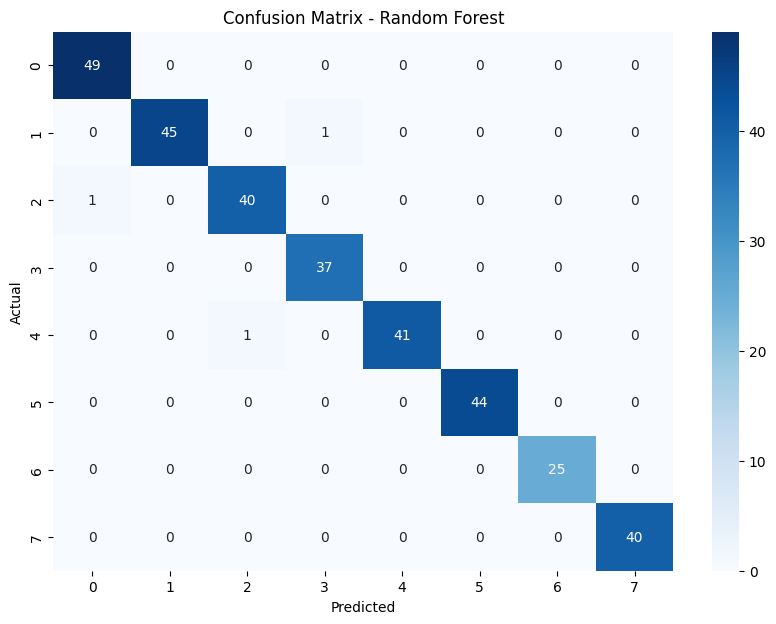

In [89]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Predictions
y_pred_rf = best_rf.predict(X_test)

# Metrics
print('Random Forest Model')
print('Accuracy:', round(accuracy_score(y_test, y_pred_rf), 3))
print('Precision:', precision_score(y_test, y_pred_rf, average='weighted'))
print('Recall:', recall_score(y_test, y_pred_rf, average='weighted'))
print('F1-Score:', f1_score(y_test, y_pred_rf, average='weighted'))
print('\nClassification Report:\n', classification_report(y_test, y_pred_rf))

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()


### Support Vector Classifier Evaluation

Support Vector Classifier Model
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       1.00      1.00      1.00        46
           2       1.00      1.00      1.00        41
           3       1.00      1.00      1.00        37
           4       1.00      1.00      1.00        42
           5       1.00      1.00      1.00        44
           6       1.00      1.00      1.00        25
           7       1.00      1.00      1.00        40

    accuracy                           1.00       324
   macro avg       1.00      1.00      1.00       324
weighted avg       1.00      1.00      1.00       324



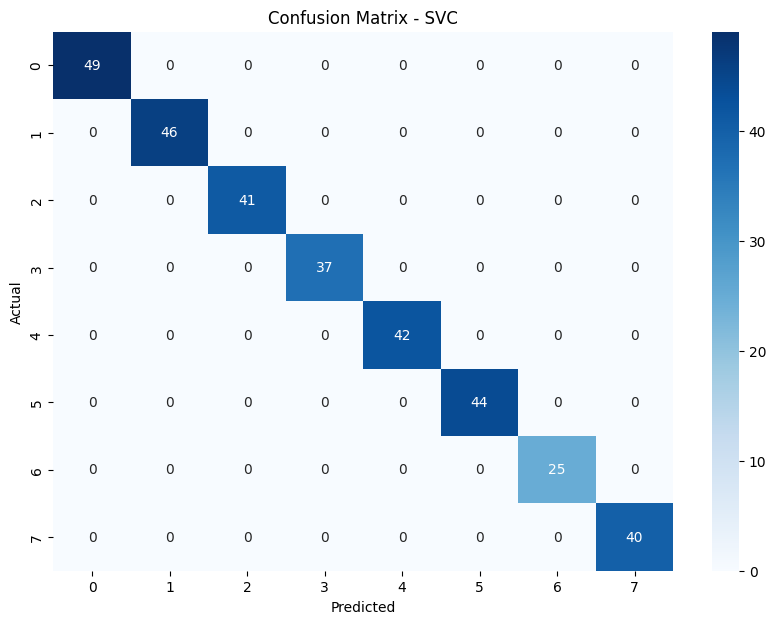

In [91]:
# Predictions
y_pred_svc = best_svc.predict(X_test)

# Metrics
print('Support Vector Classifier Model')
print('Accuracy:', round(accuracy_score(y_test, y_pred_svc), 3))
print('Precision:', precision_score(y_test, y_pred_svc, average='weighted'))
print('Recall:', recall_score(y_test, y_pred_svc, average='weighted'))
print('F1-Score:', f1_score(y_test, y_pred_svc, average='weighted'))
print('\nClassification Report:\n', classification_report(y_test, y_pred_svc))

# Confusion Matrix
cm_svc = confusion_matrix(y_test, y_pred_svc)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_svc, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVC')
plt.show()


### Multi-Layer Perceptron Classifier Evaluation

Multi-Layer Perceptron Classifier Model
Accuracy: 0.88
Precision: 0.8860320535820198
Recall: 0.8796296296296297
F1-Score: 0.8796304844357676

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.76      0.76        49
           1       0.86      0.93      0.90        46
           2       0.89      0.95      0.92        41
           3       0.91      0.86      0.89        37
           4       0.97      0.76      0.85        42
           5       0.95      0.89      0.92        44
           6       0.72      0.92      0.81        25
           7       0.98      1.00      0.99        40

    accuracy                           0.88       324
   macro avg       0.88      0.88      0.88       324
weighted avg       0.89      0.88      0.88       324



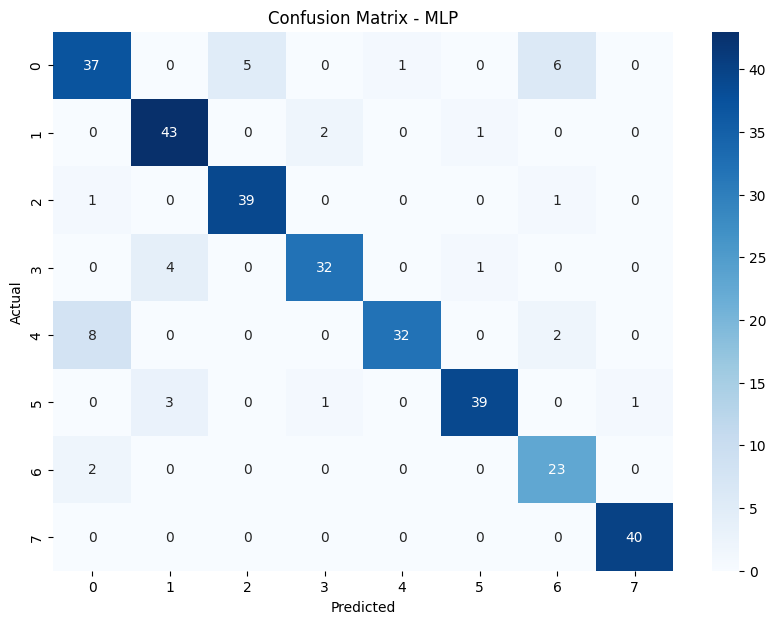

In [93]:
# Predictions
y_pred_mlp = best_mlp.predict(X_test)

# Metrics
print('Multi-Layer Perceptron Classifier Model')
print('Accuracy:', round(accuracy_score(y_test, y_pred_mlp), 3))
print('Precision:', precision_score(y_test, y_pred_mlp, average='weighted'))
print('Recall:', recall_score(y_test, y_pred_mlp, average='weighted'))
print('F1-Score:', f1_score(y_test, y_pred_mlp, average='weighted'))
print('\nClassification Report:\n', classification_report(y_test, y_pred_mlp))

# Confusion Matrix
cm_mlp = confusion_matrix(y_test, y_pred_mlp)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_mlp, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - MLP')
plt.show()


### TabNet Classifier Evaluation

TabNet Model
Accuracy: 0.960
Precision: 0.9611394732111571
Recall: 0.9598765432098766
F1-Score: 0.9596985199372737

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.96      0.92        49
           1       0.96      1.00      0.98        46
           2       0.95      1.00      0.98        41
           3       0.97      0.95      0.96        37
           4       0.97      0.88      0.93        42
           5       1.00      0.98      0.99        44
           6       0.96      0.88      0.92        25
           7       1.00      1.00      1.00        40

    accuracy                           0.96       324
   macro avg       0.96      0.96      0.96       324
weighted avg       0.96      0.96      0.96       324



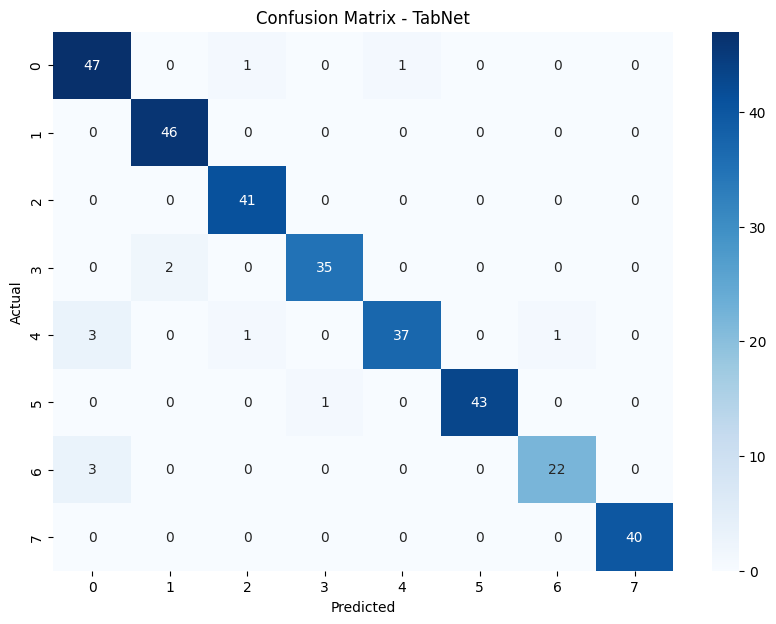

In [95]:
# Predictions
preds_tabnet = best_tabnet.predict(X_test)
accuracy_tabnet = np.mean(preds_tabnet == y_test)

# Metrics
print('TabNet Model')
print(f'Accuracy: {accuracy_tabnet:.3f}')
print('Precision:', precision_score(y_test, preds_tabnet, average='weighted'))
print('Recall:', recall_score(y_test, preds_tabnet, average='weighted'))
print('F1-Score:', f1_score(y_test, preds_tabnet, average='weighted'))
print('\nClassification Report:\n', classification_report(y_test, preds_tabnet))

# Confusion Matrix
cm_tabnet = confusion_matrix(y_test, preds_tabnet)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_tabnet, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - TabNet')
plt.show()


Feature ranking:
1. feature ITSN1_N (0.3974)
2. feature BDNF_N (0.3131)
3. feature DYRK1A_N (0.2896)


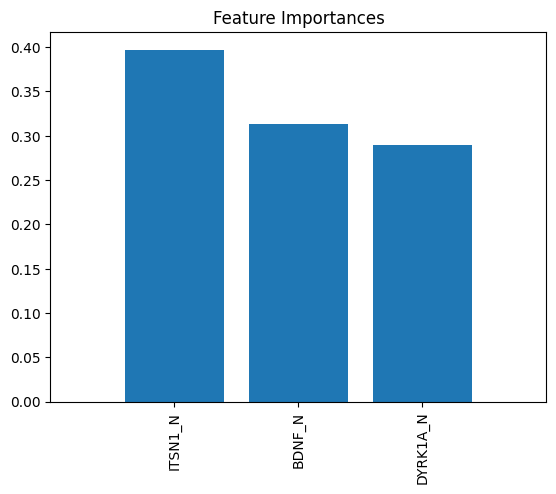

In [100]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt

# Ensure you have a model that provides feature importances, e.g., RandomForest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Check if the model has feature importances
if hasattr(model, 'feature_importances_'):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]

    # Ensure we do not exceed the bounds of available features
    num_features = min(len(columns), len(importances))

    print("Feature ranking:")
    for f in range(num_features):
        print(f"{f + 1}. feature {columns[indices[f]]} ({importances[indices[f]]:.4f})")

    # Plot the feature importances
    plt.figure()
    plt.title("Feature Importances")
    plt.bar(range(num_features), importances[indices[:num_features]], align="center")
    plt.xticks(range(num_features), [columns[i] for i in indices[:num_features]], rotation=90)
    plt.xlim([-1, num_features])
    plt.show()
else:
    print("Model does not provide feature importances")


In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

# Assuming the RandomForest model is already trained and features are scaled
# Get feature importances from the trained RandomForest model
importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Get the top 10 most important features
top_10_indices = indices[:10]
top_10_features = [columns[i] for i in top_10_indices]

print("Top 10 most important proteins:")
print(top_10_features)


Top 10 most important proteins:
['ITSN1_N', 'BDNF_N', 'DYRK1A_N']


<Figure size 1600x800 with 0 Axes>

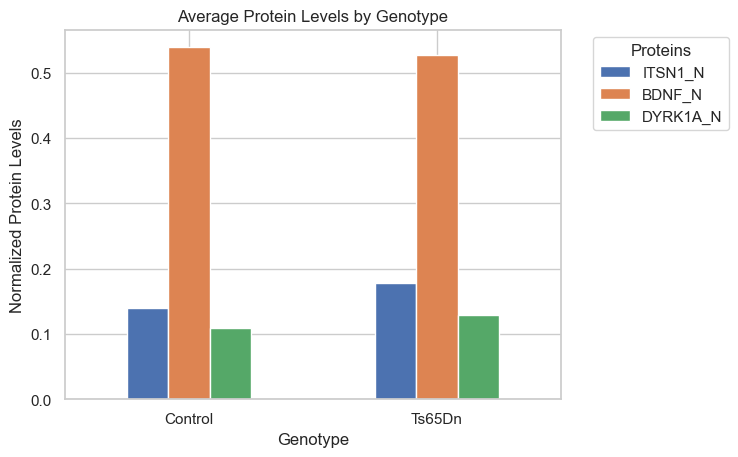

<Figure size 1600x800 with 0 Axes>

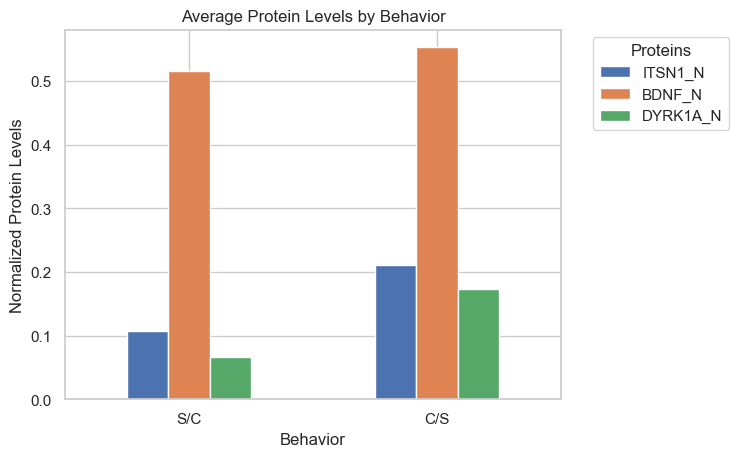

<Figure size 1600x800 with 0 Axes>

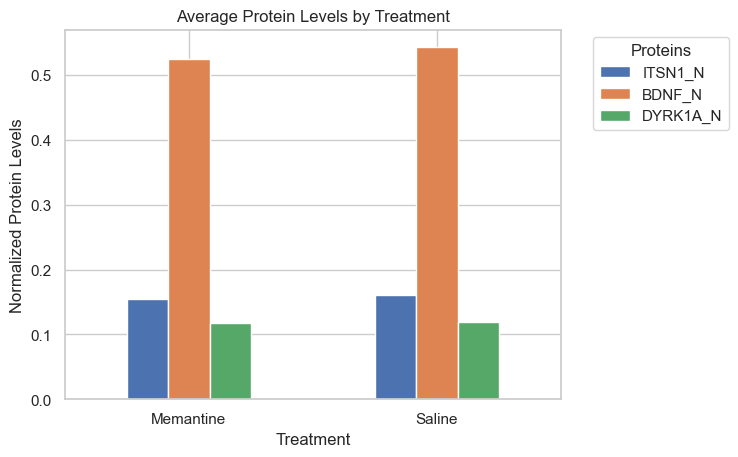

In [112]:
# Subset the dataframe for the top 10 proteins
df_top10 = df[top_10_features + ['Genotype', 'Behavior', 'Treatment']]

# Average levels by Genotype
genotype_effects = df_top10.groupby('Genotype').mean().reset_index()

# Average levels by Behavior
behavior_effects = df_top10.groupby('Behavior').mean().reset_index()

# Average levels by Treatment
treatment_effects = df_top10.groupby('Treatment').mean().reset_index()

# Plot average levels by Genotype
plt.figure(figsize=(16, 8))
df_top10.groupby('Genotype')[top_10_features].mean().plot(kind='bar')
plt.title('Average Protein Levels by Genotype')
plt.ylabel('Normalized Protein Levels')
plt.xlabel('Genotype')
plt.xticks(ticks=[0, 1], labels=['Control', 'Ts65Dn'], rotation=0)
plt.legend(title='Proteins', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Plot average levels by Behavior
plt.figure(figsize=(16, 8))
df_top10.groupby('Behavior')[top_10_features].mean().plot(kind='bar')
plt.title('Average Protein Levels by Behavior')
plt.ylabel('Normalized Protein Levels')
plt.xlabel('Behavior')
plt.xticks(ticks=[0, 1], labels=['S/C', 'C/S'], rotation=0)
plt.legend(title='Proteins', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Plot average levels by Treatment
plt.figure(figsize=(16, 8))
df_top10.groupby('Treatment')[top_10_features].mean().plot(kind='bar')
plt.title('Average Protein Levels by Treatment')
plt.ylabel('Normalized Protein Levels')
plt.xlabel('Treatment')
plt.xticks(ticks=[0, 1], labels=['Memantine', 'Saline'], rotation=0)
plt.legend(title='Proteins', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


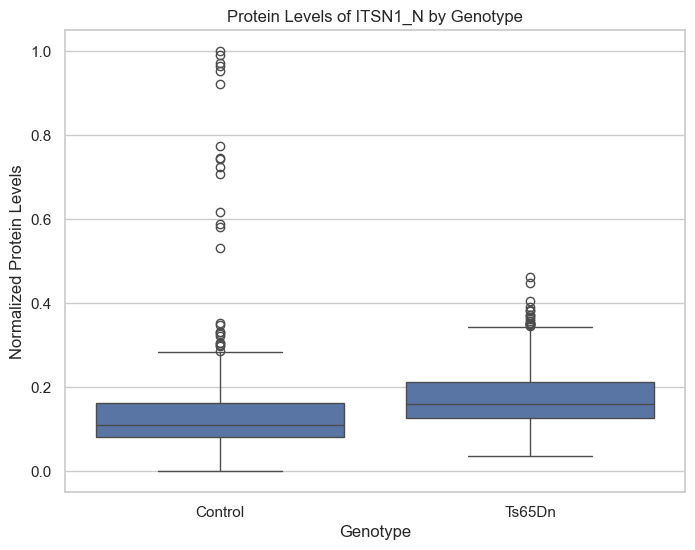

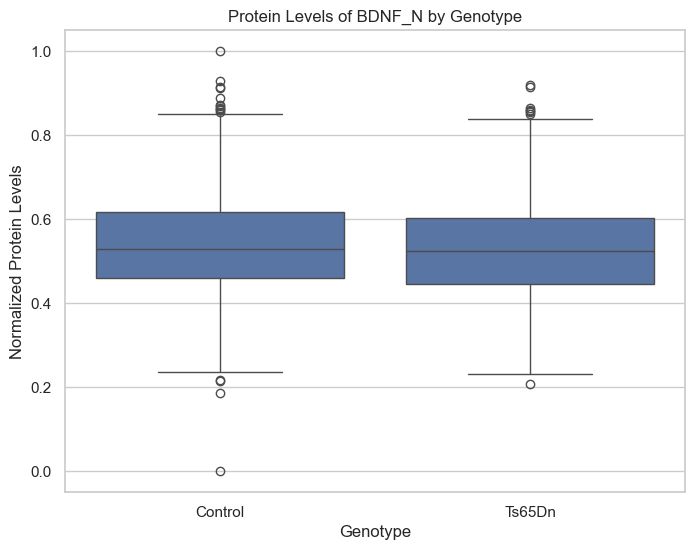

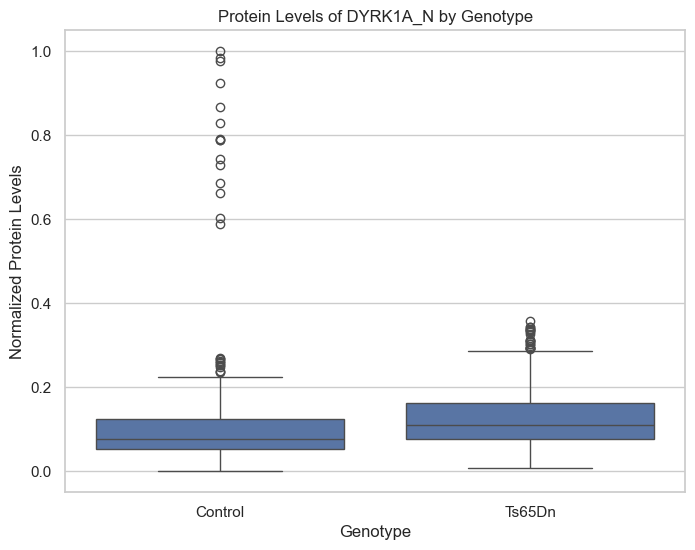

In [114]:
# Plotting protein levels for top 10 features by Genotype
for col in top_10_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Genotype', y=col, data=df_top10)
    plt.title(f'Protein Levels of {col} by Genotype')
    plt.xlabel('Genotype')
    plt.ylabel('Normalized Protein Levels')
    plt.xticks(ticks=[0, 1], labels=['Control', 'Ts65Dn'])
    plt.show()

# Similarly, you can plot for Behavior and Treatment
